importing Jupyter notebook from ML_trial.ipynb
importing Jupyter notebook from EDA.ipynb
KNN: 0.7068980218281037 , RandomForest: 0.7068980218281037 , LogisticRegression 0.7068980218281037


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


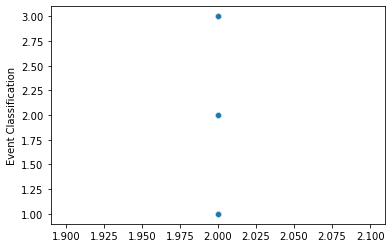

In [1]:
import import_ipynb
import numpy as np
import pandas as pd
import ML_trial
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvec = CountVectorizer()
tfidf = TfidfVectorizer()

In [2]:
# copying file to avoid changing original
df = ML_trial.df.copy()
df.head()

,Recalling Firm Name,Product Type,Recalling Firm Country,Reason for Recall,Product Description,Event Classification
0,ELITE CONFECTIONERY LTD,0.0,0.0,Potential contamination with Salmonella,Elite Hazelnut & Almond Milk Chocolate Bar Net...,1
1,ELITE CONFECTIONERY LTD,0.0,0.0,Potential contamination with Salmonella,ELITE MILK CHOCOLATE BAR WITH STRAWBERRY CREAM...,1
2,ELITE CONFECTIONERY LTD,0.0,0.0,Potential contamination with Salmonella,ELITE POPPING ROCKS MILK CHOCOLATE BAR UPC:815...,1
3,ELITE CONFECTIONERY LTD,0.0,0.0,Potential contamination with Salmonella,ELITE WHITE CHOCOLATE BAR\tUPC:815871011471 & ...,1
4,ELITE CONFECTIONERY LTD,0.0,0.0,Potential contamination with Salmonella,ELITE MILK CHOCOLATE WITH BERRY FLAVOR TRUFFLE...,1


In [3]:
# Changing 'Reason for Recall' from object to string type before nlp
df['Reason for Recall']=df['Reason for Recall'].astype('string')
df.dtypes

Recalling Firm Name        object
Product Type              float64
Recalling Firm Country    float64
Reason for Recall          string
Product Description        object
Event Classification        int64
dtype: object

In [4]:
X = cvec.fit_transform(df['Reason for Recall']) #vectorization
np.shape(X) #shape matches df
list_of_words = list(cvec.vocabulary_.keys())

In [5]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
vect_df = pd.DataFrame(X.toarray(),columns=list_of_words)
vect_df.head()

,potential,contamination,with,salmonella,the,pump,may,have,welding,defect,...,770151300l,mozaik,770151300,murocel,aet,carbostyril,diazepam,tfrs,130b16,7oz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Computing frequency of words and max frequency

In [7]:
counts = np.asarray(X.sum(axis=0))
np.max(counts)

92381

In [8]:
freq_df = pd.DataFrame(counts, columns=list_of_words).T.sort_values(by=0,ascending=False)
freq_df.columns=['frequency']
freq_df

,frequency
twisp,92381
32x3,58558
champtions,39788
argyle,32924
1010306,26730
...,...
d1,1
316lvm,1
diode,1
deviled,1


The most important tokenized word in Reason for Recall is "salmonella" 

In [9]:
xx = tfidf.fit_transform(df['Reason for Recall'])
df = pd.DataFrame(xx[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df

,TF-IDF
salmonella,0.618704
contamination,0.540233
potential,0.438677
with,0.364576
oor,0.000000
...,...
dcu,0.000000
dcs,0.000000
dcps,0.000000
dcp,0.000000
